# Hunter Klinglesmith
# Do Directors and/or their actors have the biggest influence on movie success?

In [28]:
import pandas as pd

In [29]:
filepath = 'imdb_all_years.csv'

df = pd.read_csv(filepath)
df.drop(['Movie Link', 'Duration', 'writers', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages', 'release_date'], axis=1, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,1. Swiss Family Robinson,1960,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,NaN,['Ken Annakin'],"['John Mills', 'Dorothy McGuire', 'James MacAr...",0,0,0
1,2. Psycho,1960,R,8.5,741K,806947.0,32066835.0,32000000.0,NaN,['Alfred Hitchcock'],"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']",0,14,4
2,3. The Apartment,1960,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,NaN,['Billy Wilder'],"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...",0,8,0
3,4. Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
4,5. Breathless,1960,Not Rated,7.7,90K,400000.0,594039.0,414173.0,32424.0,['Jean-Luc Godard'],"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...",0,4,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Year                   33600 non-null  int64  
 2   MPA                    25624 non-null  object 
 3   Rating                 33462 non-null  float64
 4   Votes                  33462 non-null  object 
 5   budget                 11815 non-null  float64
 6   grossWorldWide         18222 non-null  float64
 7   gross_US_Canada        17571 non-null  float64
 8   opening_weekend_Gross  15523 non-null  float64
 9   directors              33600 non-null  object 
 10  stars                  33600 non-null  object 
 11  wins                   33600 non-null  int64  
 12  nominations            33600 non-null  int64  
 13  oscars                 33600 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 3.6+ 

In [31]:
df.dropna(inplace=True)
df.isna().sum()

Title                    0
Year                     0
MPA                      0
Rating                   0
Votes                    0
budget                   0
grossWorldWide           0
gross_US_Canada          0
opening_weekend_Gross    0
directors                0
stars                    0
wins                     0
nominations              0
oscars                   0
dtype: int64

In [32]:
df.head(5)

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
3,4. Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
4,5. Breathless,1960,Not Rated,7.7,90K,400000.0,594039.0,414173.0,32424.0,['Jean-Luc Godard'],"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...",0,4,1
5,6. Mughal-E-Azam,1960,Not Rated,8.1,9.1K,15000000.0,161434.0,161434.0,60258.0,['K. Asif'],"['Prithviraj Kapoor', 'Madhubala', 'Dilip Kumar']",0,3,0
8,9. The Bad Sleep Well,1960,Not Rated,8.0,15K,82540000.0,46961.0,46808.0,15942.0,['Akira Kurosawa'],"['Toshirô Mifune', 'Masayuki Mori', 'Kyôko Kag...",0,0,0
12,13. Shoot the Piano Player,1960,Not Rated,7.4,21K,890063.0,21124.0,21124.0,11206.0,['François Truffaut'],"['Charles Aznavour', 'Marie Dubois', 'Nicole B...",0,0,0


In [33]:
df.reset_index(drop=True, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,4. Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
1,5. Breathless,1960,Not Rated,7.7,90K,400000.0,594039.0,414173.0,32424.0,['Jean-Luc Godard'],"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...",0,4,1
2,6. Mughal-E-Azam,1960,Not Rated,8.1,9.1K,15000000.0,161434.0,161434.0,60258.0,['K. Asif'],"['Prithviraj Kapoor', 'Madhubala', 'Dilip Kumar']",0,3,0
3,9. The Bad Sleep Well,1960,Not Rated,8.0,15K,82540000.0,46961.0,46808.0,15942.0,['Akira Kurosawa'],"['Toshirô Mifune', 'Masayuki Mori', 'Kyôko Kag...",0,0,0
4,13. Shoot the Piano Player,1960,Not Rated,7.4,21K,890063.0,21124.0,21124.0,11206.0,['François Truffaut'],"['Charles Aznavour', 'Marie Dubois', 'Nicole B...",0,0,0


In [34]:
df['Profitability Ratio'] = df['grossWorldWide'] / df['budget']
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio
0,4. Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0,0.153915
1,5. Breathless,1960,Not Rated,7.7,90K,400000.0,594039.0,414173.0,32424.0,['Jean-Luc Godard'],"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...",0,4,1,1.485097
2,6. Mughal-E-Azam,1960,Not Rated,8.1,9.1K,15000000.0,161434.0,161434.0,60258.0,['K. Asif'],"['Prithviraj Kapoor', 'Madhubala', 'Dilip Kumar']",0,3,0,0.010762
3,9. The Bad Sleep Well,1960,Not Rated,8.0,15K,82540000.0,46961.0,46808.0,15942.0,['Akira Kurosawa'],"['Toshirô Mifune', 'Masayuki Mori', 'Kyôko Kag...",0,0,0,0.000569
4,13. Shoot the Piano Player,1960,Not Rated,7.4,21K,890063.0,21124.0,21124.0,11206.0,['François Truffaut'],"['Charles Aznavour', 'Marie Dubois', 'Nicole B...",0,0,0,0.023733


In [35]:
def expand_lists(df, columns):
    '''
    Expands the specified columns containing lists into separate rows.
    '''
    expanded_list = []
    for i in range(len(df)):
        # Create a copy of the row
        row_copy = df.iloc[i].copy()
        # Create a list of rows to be expanded
        rows_to_expand = [row_copy]
        
        for column in columns:
            # Remove the formatting characters from the cell
            cell = df[column][i].replace('[', '').replace(']', '').replace("'", '').replace('"', '')
            # Split the items in the cell to a list
            cell_list = cell.split(',')

            if cell_list == ['']:
                rows_to_expand = []
                continue
                # cell_list = ['NaN']
            
            # Expand the rows for the current column
            expanded_rows = []
            for item in cell_list:
                for row in rows_to_expand:
                    new_row = row.copy()
                    new_row[column] = item.strip()
                    expanded_rows.append(new_row)
            rows_to_expand = expanded_rows
        
        expanded_list.extend(rows_to_expand)
    
    return pd.DataFrame(expanded_list)


# Directors

In [36]:
# Expand the columns with lists: 'directors'
directors_expanded_df = expand_lists(df, ['directors'])

In [37]:
by_directors_df = pd.DataFrame(directors_expanded_df.value_counts('directors'))
by_directors_df.reset_index(inplace=True)
by_directors_df

,directors,count
0,Woody Allen,36
1,Clint Eastwood,33
2,Steven Spielberg,29
3,Ridley Scott,26
4,Steven Soderbergh,26
...,...,...
3925,Jayson Thiessen,1
3926,Jean Beaudin,1
3927,Jean Duval,1
3928,Jean-Claude La Marre,1


In [38]:
# Drop the directors with fewer than 10 movies
by_directors_df = by_directors_df[by_directors_df['count'] >= 10]
by_directors_df

,directors,count
0,Woody Allen,36
1,Clint Eastwood,33
2,Steven Spielberg,29
3,Ridley Scott,26
4,Steven Soderbergh,26
...,...,...
101,John Badham,10
102,Quentin Tarantino,10
103,James Foley,10
104,James Ivory,10


In [39]:
directors_list = by_directors_df['directors'].to_list()

# Dictionary to store the profitability ratio for each director
directors_profitability = {}

# Loop through all of the directors in the list and get the profitability ratio
for director in directors_list:
    for row_index in range(len(directors_expanded_df)):
        if directors_expanded_df['directors'].iloc[row_index] == director:
            directors_profitability[director] = directors_profitability.get(director, 0) + directors_expanded_df['Profitability Ratio'].iloc[row_index]

directors_profitability_df = pd.DataFrame(directors_profitability.items(), columns=['directors', 'Total Profitability Ratio'])
directors_profitability_df.head()

,directors,Total Profitability Ratio
0,Woody Allen,62.334087
1,Clint Eastwood,106.293169
2,Steven Spielberg,309.963957
3,Ridley Scott,58.410839
4,Steven Soderbergh,67.205589


In [40]:
# Add the profitability ratio for each director to the dataframe
by_directors_df = by_directors_df.merge(directors_profitability_df, on='directors')
by_directors_df.head()

,directors,count,Total Profitability Ratio
0,Woody Allen,36,62.334087
1,Clint Eastwood,33,106.293169
2,Steven Spielberg,29,309.963957
3,Ridley Scott,26,58.410839
4,Steven Soderbergh,26,67.205589


In [41]:
by_directors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio
13,Robert Rodriguez,18,333.503921
2,Steven Spielberg,29,309.963957
72,James Wan,11,230.041839
39,Kevin Smith,13,182.070137
22,M. Night Shyamalan,15,112.054682


In [42]:
by_directors_df.iloc[:30]

,directors,count,Total Profitability Ratio
13,Robert Rodriguez,18,333.503921
2,Steven Spielberg,29,309.963957
72,James Wan,11,230.041839
39,Kevin Smith,13,182.070137
22,M. Night Shyamalan,15,112.054682
101,John Badham,10,107.045671
1,Clint Eastwood,33,106.293169
24,Ivan Reitman,14,95.388634
42,Chris Columbus,13,90.233541
32,Richard Linklater,13,87.621748


<Axes: xlabel='directors'>

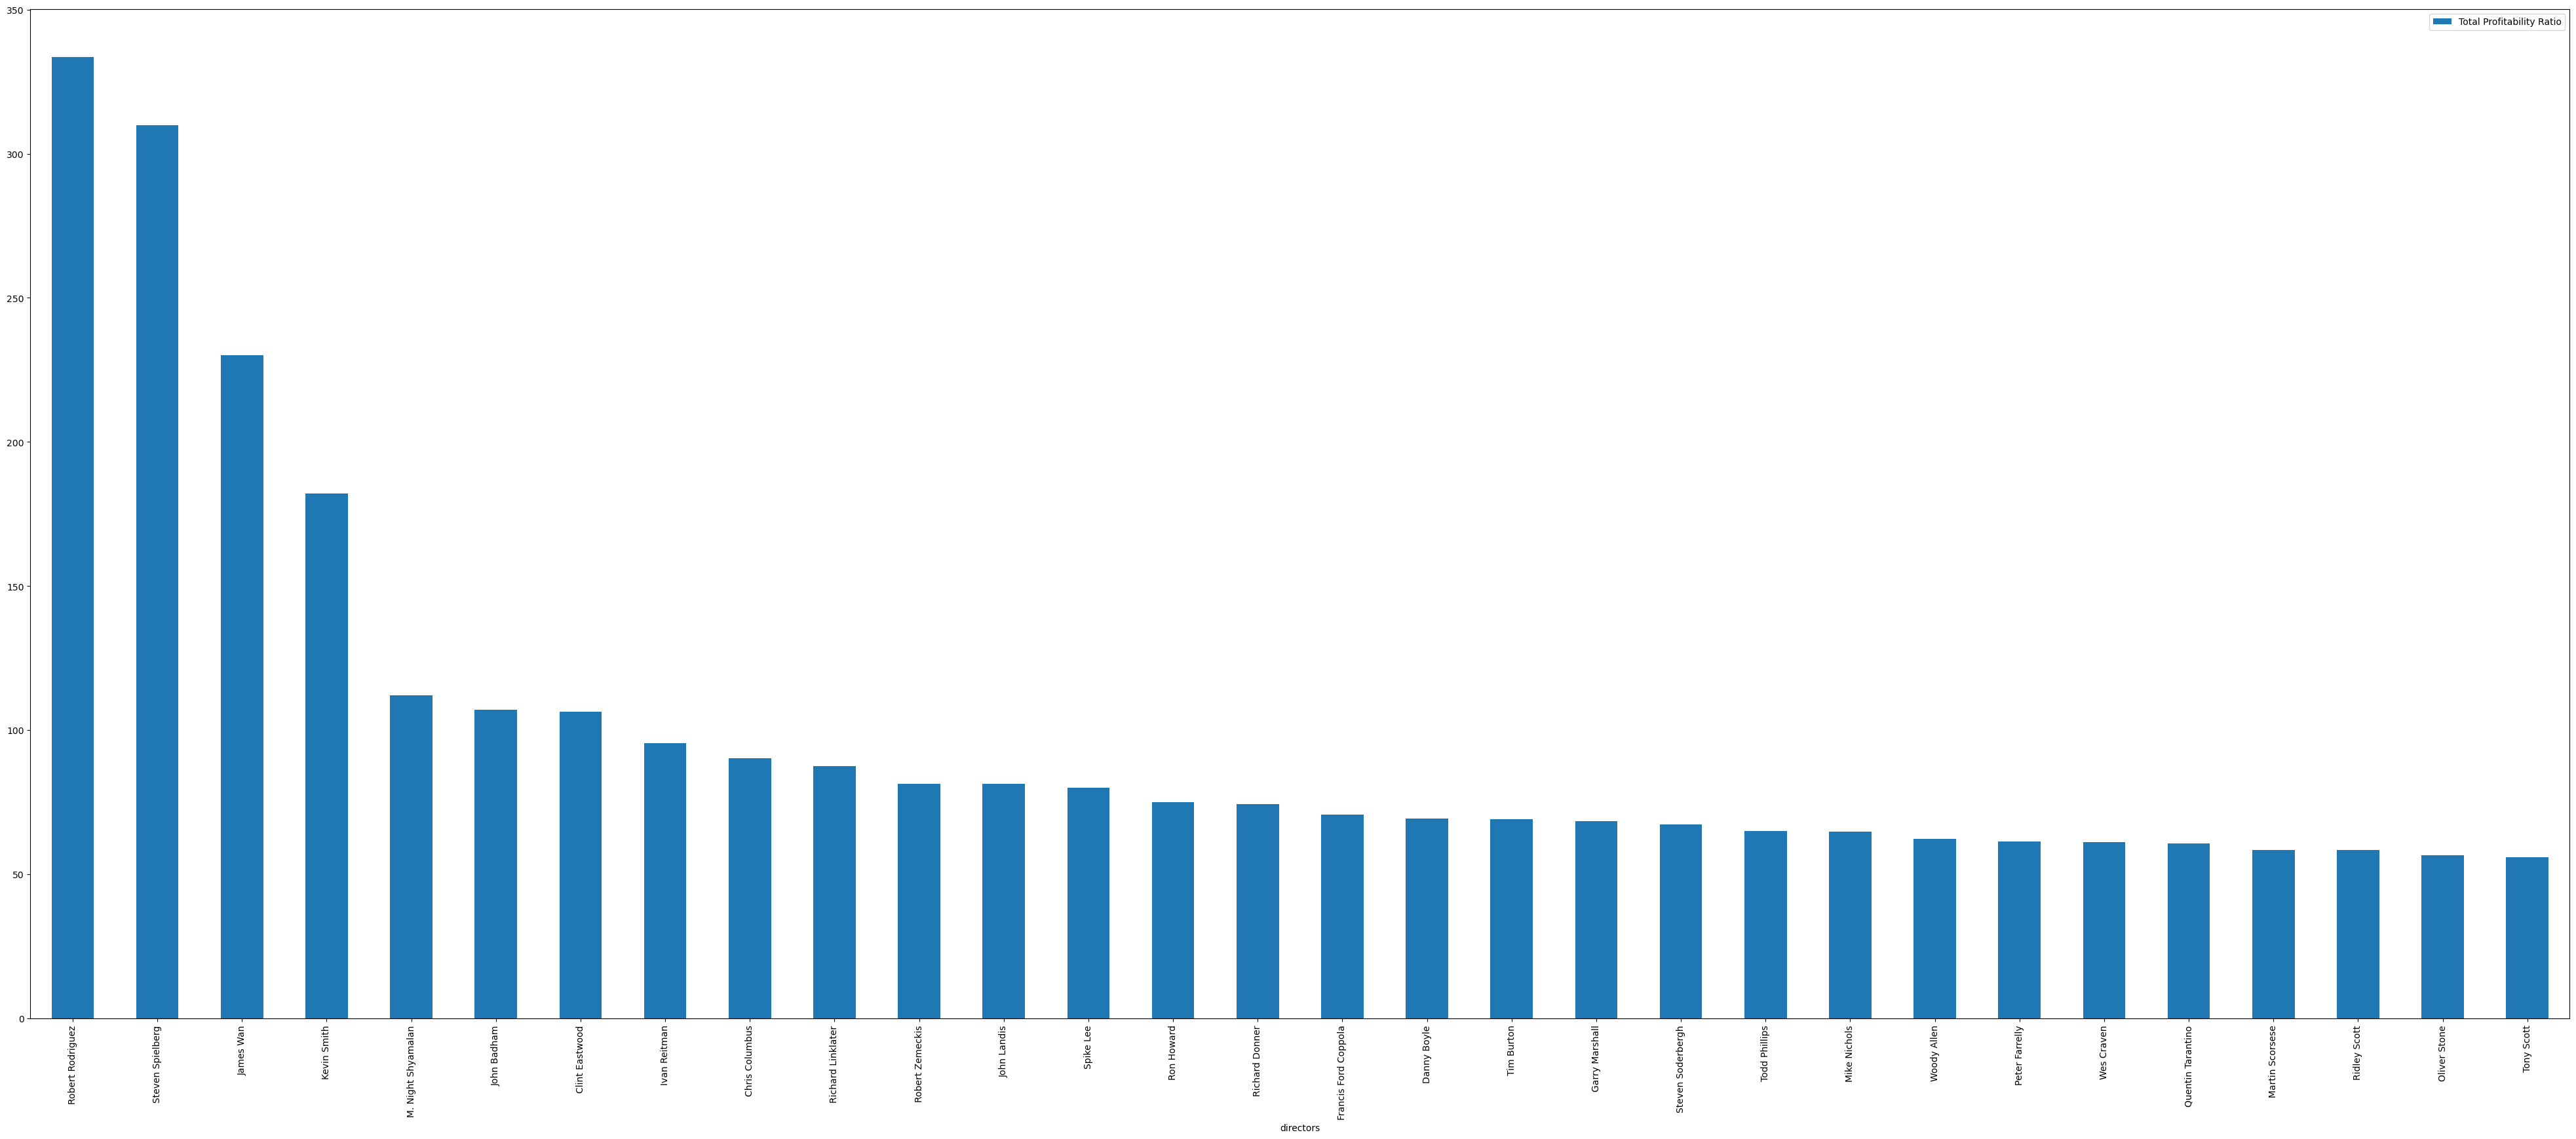

In [44]:
# Plot a bar chart of the total profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Total Profitability Ratio', kind='bar', figsize=(50, 20))

In [46]:
by_directors_df['Profitability Ratio'] = by_directors_df['Total Profitability Ratio'] / by_directors_df['count']
by_directors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio,Profitability Ratio
72,James Wan,11,230.041839,20.912894
13,Robert Rodriguez,18,333.503921,18.527996
39,Kevin Smith,13,182.070137,14.005395
101,John Badham,10,107.045671,10.704567
2,Steven Spielberg,29,309.963957,10.688412


<Axes: xlabel='directors'>

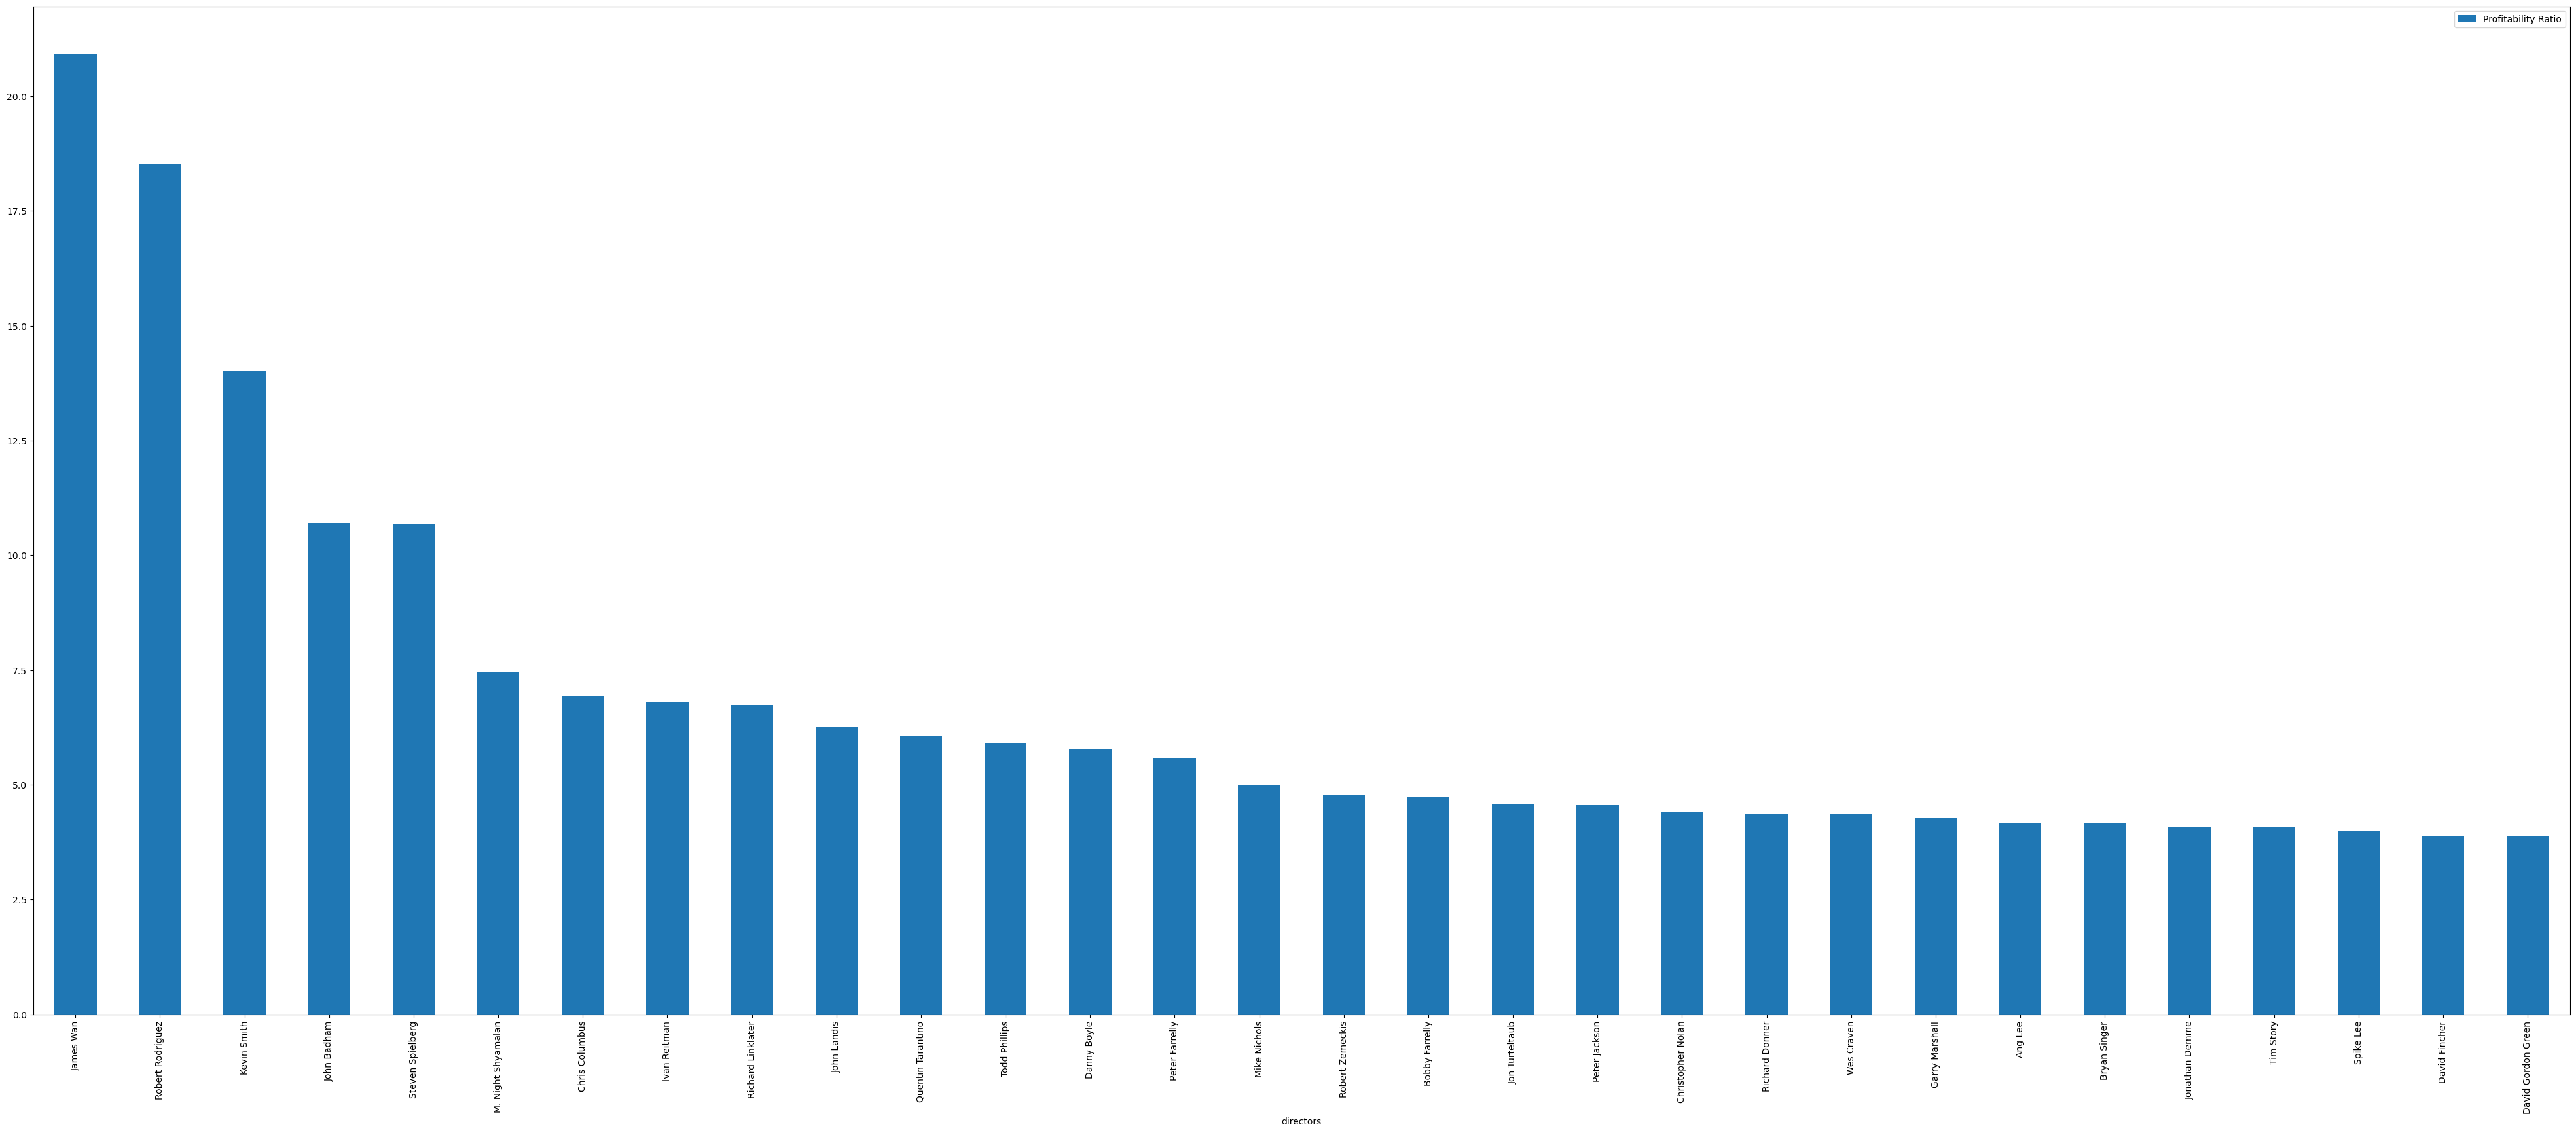

In [47]:
# Plot a bar chart of the profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Profitability Ratio', kind='bar', figsize=(50, 20))

# Actors

In [80]:
# Expand the columns with lists: 'stars' into separate rows
actors_expanded_df = expand_lists(df, ['stars'])

In [81]:
by_actors_df = pd.DataFrame(actors_expanded_df.value_counts('stars'))
by_actors_df.reset_index(inplace=True)
by_actors_df

,stars,count
0,Robert De Niro,65
1,Nicolas Cage,58
2,Samuel L. Jackson,54
3,Tom Hanks,51
4,Bruce Willis,48
...,...,...
9084,Jake Roberts,1
9085,Jake Lloyd,1
9086,Jake Dengel,1
9087,Jaimyse Haft,1


In [83]:
# Drop the directors with fewer than 10 movies
by_actors_df = by_actors_df[by_actors_df['count'] >= 10]
by_actors_df

,stars,count
0,Robert De Niro,65
1,Nicolas Cage,58
2,Samuel L. Jackson,54
3,Tom Hanks,51
4,Bruce Willis,48
...,...,...
492,Jennifer Tilly,10
493,Freddie Prinze Jr.,10
494,Sarah Polley,10
495,Madeleine Stowe,10


In [84]:
actors_list = by_actors_df['stars'].to_list()

# Dictionary to store the profitability ratio for each director
actors_profitability = {}

# Loop through all of the directors in the list and get the profitability ratio
for actor in actors_list:
    for row_index in range(len(actors_expanded_df)):
        if actors_expanded_df['stars'].iloc[row_index] == actor:
            actors_profitability[actor] = actors_profitability.get(actor, 0) + actors_expanded_df['Profitability Ratio'].iloc[row_index]
            # print(actors_expanded_df['Profitability Ratio'].iloc[row_index])

actors_profitability_df = pd.DataFrame(actors_profitability.items(), columns=['stars', 'Total Profitability Ratio'])
actors_profitability_df.head()

,stars,Total Profitability Ratio
0,Robert De Niro,156.115075
1,Nicolas Cage,150.766930
2,Samuel L. Jackson,156.720182
3,Tom Hanks,203.872033
4,Bruce Willis,122.455387


In [85]:
# Add the profitability ratio for each director to the dataframe
by_actors_df = by_actors_df.merge(actors_profitability_df, on='stars')
by_actors_df.head()

,stars,count,Total Profitability Ratio
0,Robert De Niro,65,156.115075
1,Nicolas Cage,58,150.766930
2,Samuel L. Jackson,54,156.720182
3,Tom Hanks,51,203.872033
4,Bruce Willis,48,122.455387


In [86]:
by_actors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio
267,Jet Li,15,145027.102963
64,Drew Barrymore,28,367.409965
32,John Travolta,33,252.481238
18,Harrison Ford,38,239.712601
3,Tom Hanks,51,203.872033


<Axes: xlabel='stars'>

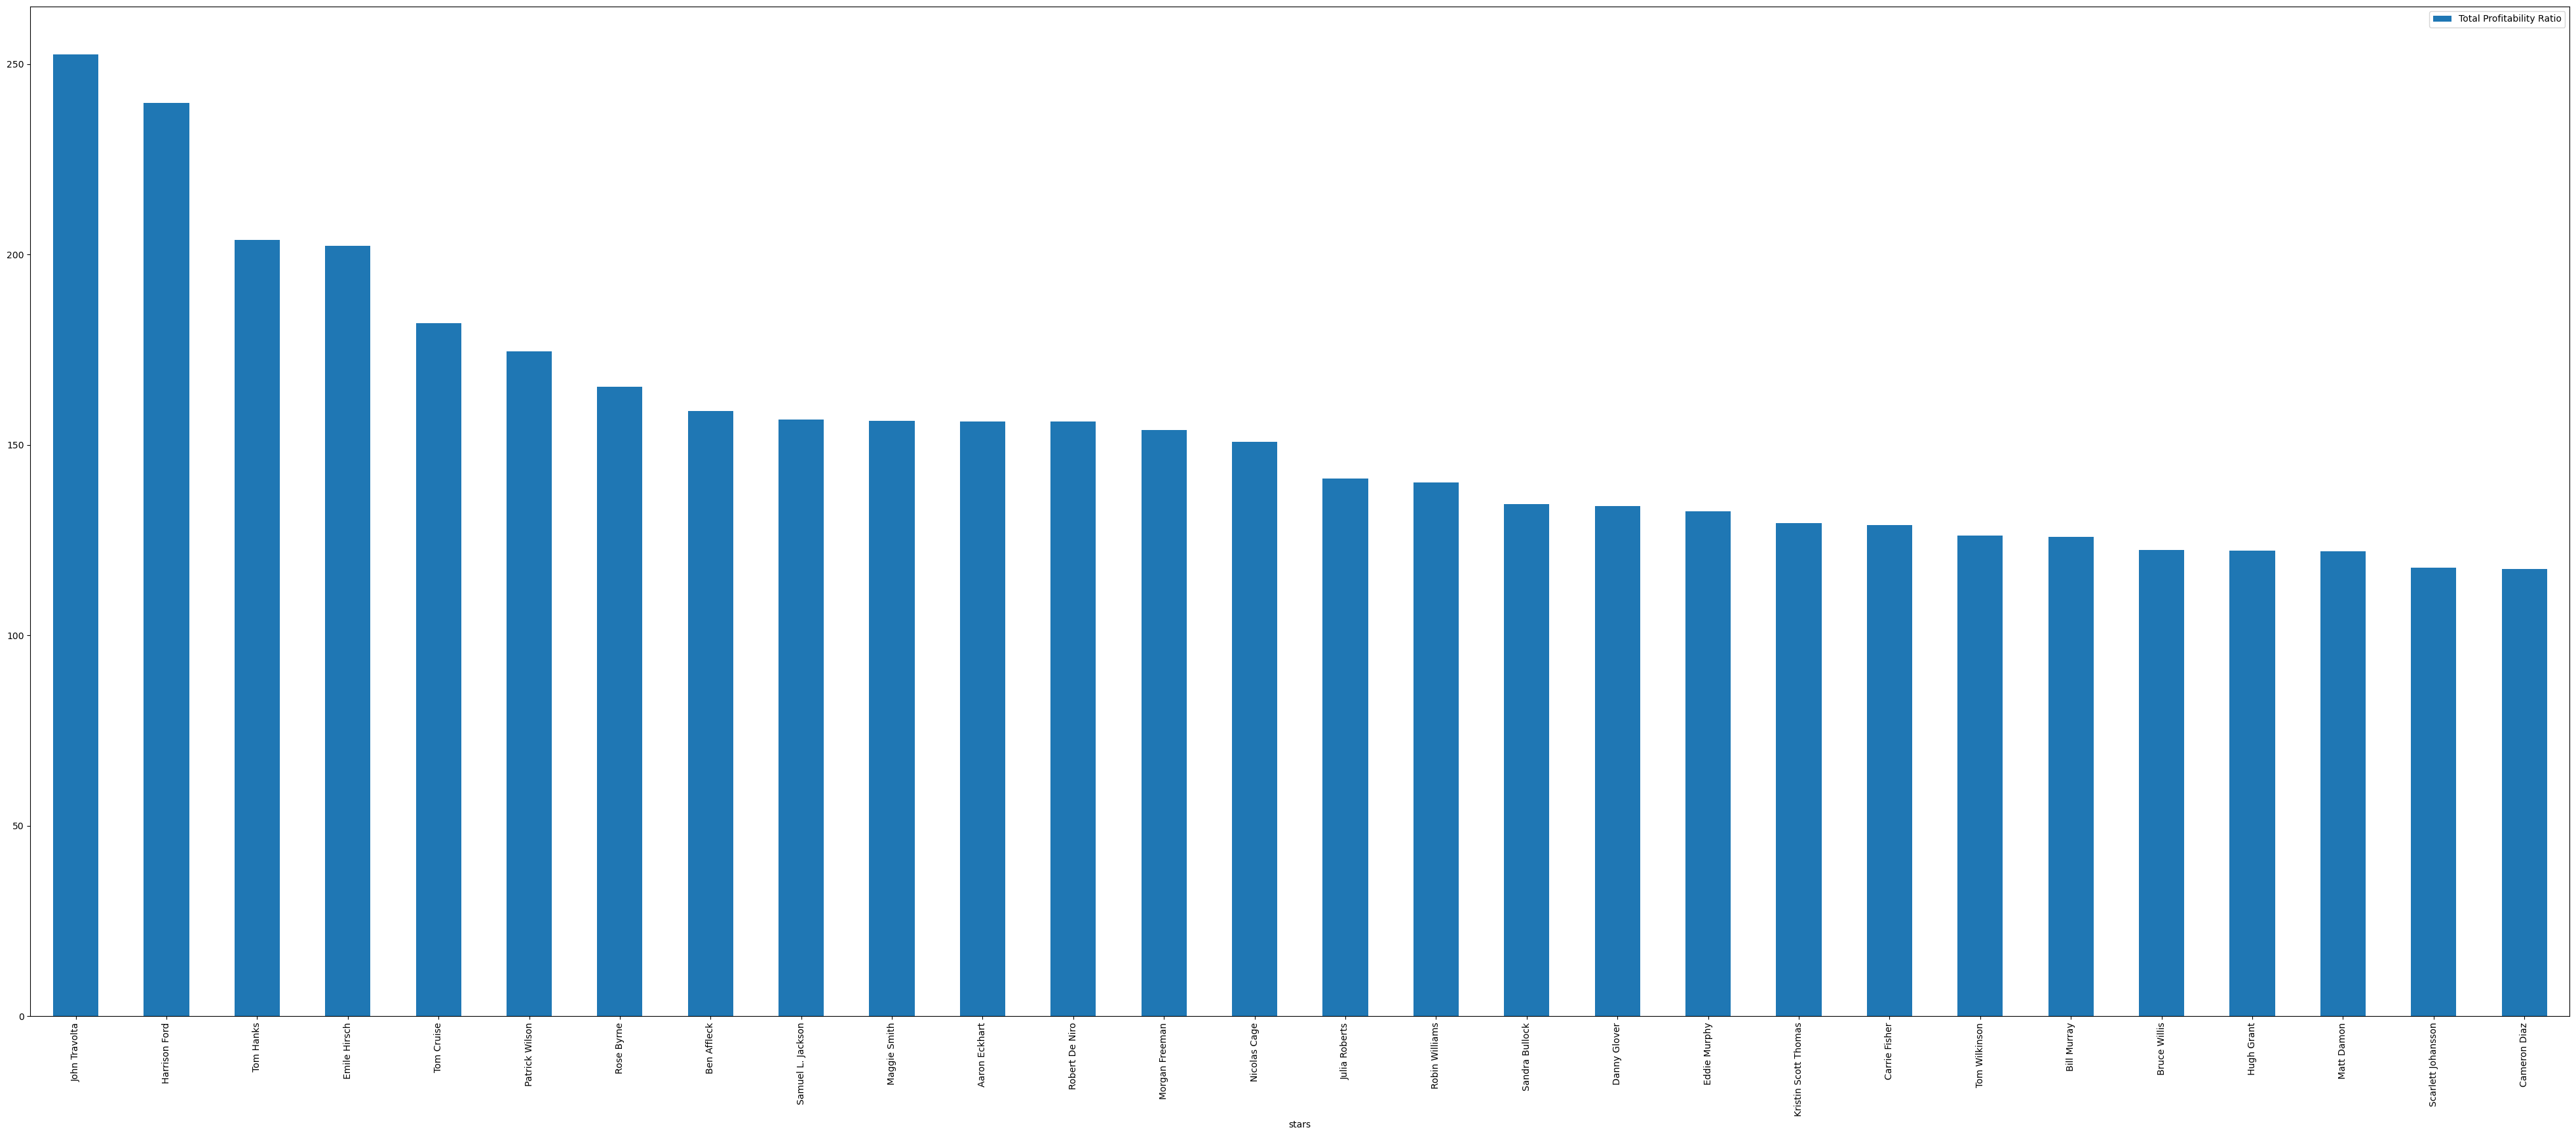

In [ ]:
# Plot a bar chart of the total profitability ratio for each director, excluding jet li since he is bt far the highest
by_actors_df.iloc[2:30].plot(x='stars', y='Total Profitability Ratio', kind='bar', figsize=(50, 20))

In [91]:
by_actors_df['Profitability Ratio'] = by_actors_df['Total Profitability Ratio'] / by_actors_df['count']
by_actors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio
267,Jet Li,15,145027.102963,9668.473531
271,Emile Hirsch,14,202.210234,14.443588
64,Drew Barrymore,28,367.409965,13.121784
471,Carrie Fisher,10,128.963986,12.896399
311,Maggie Smith,13,156.317739,12.024441


<Axes: xlabel='stars'>

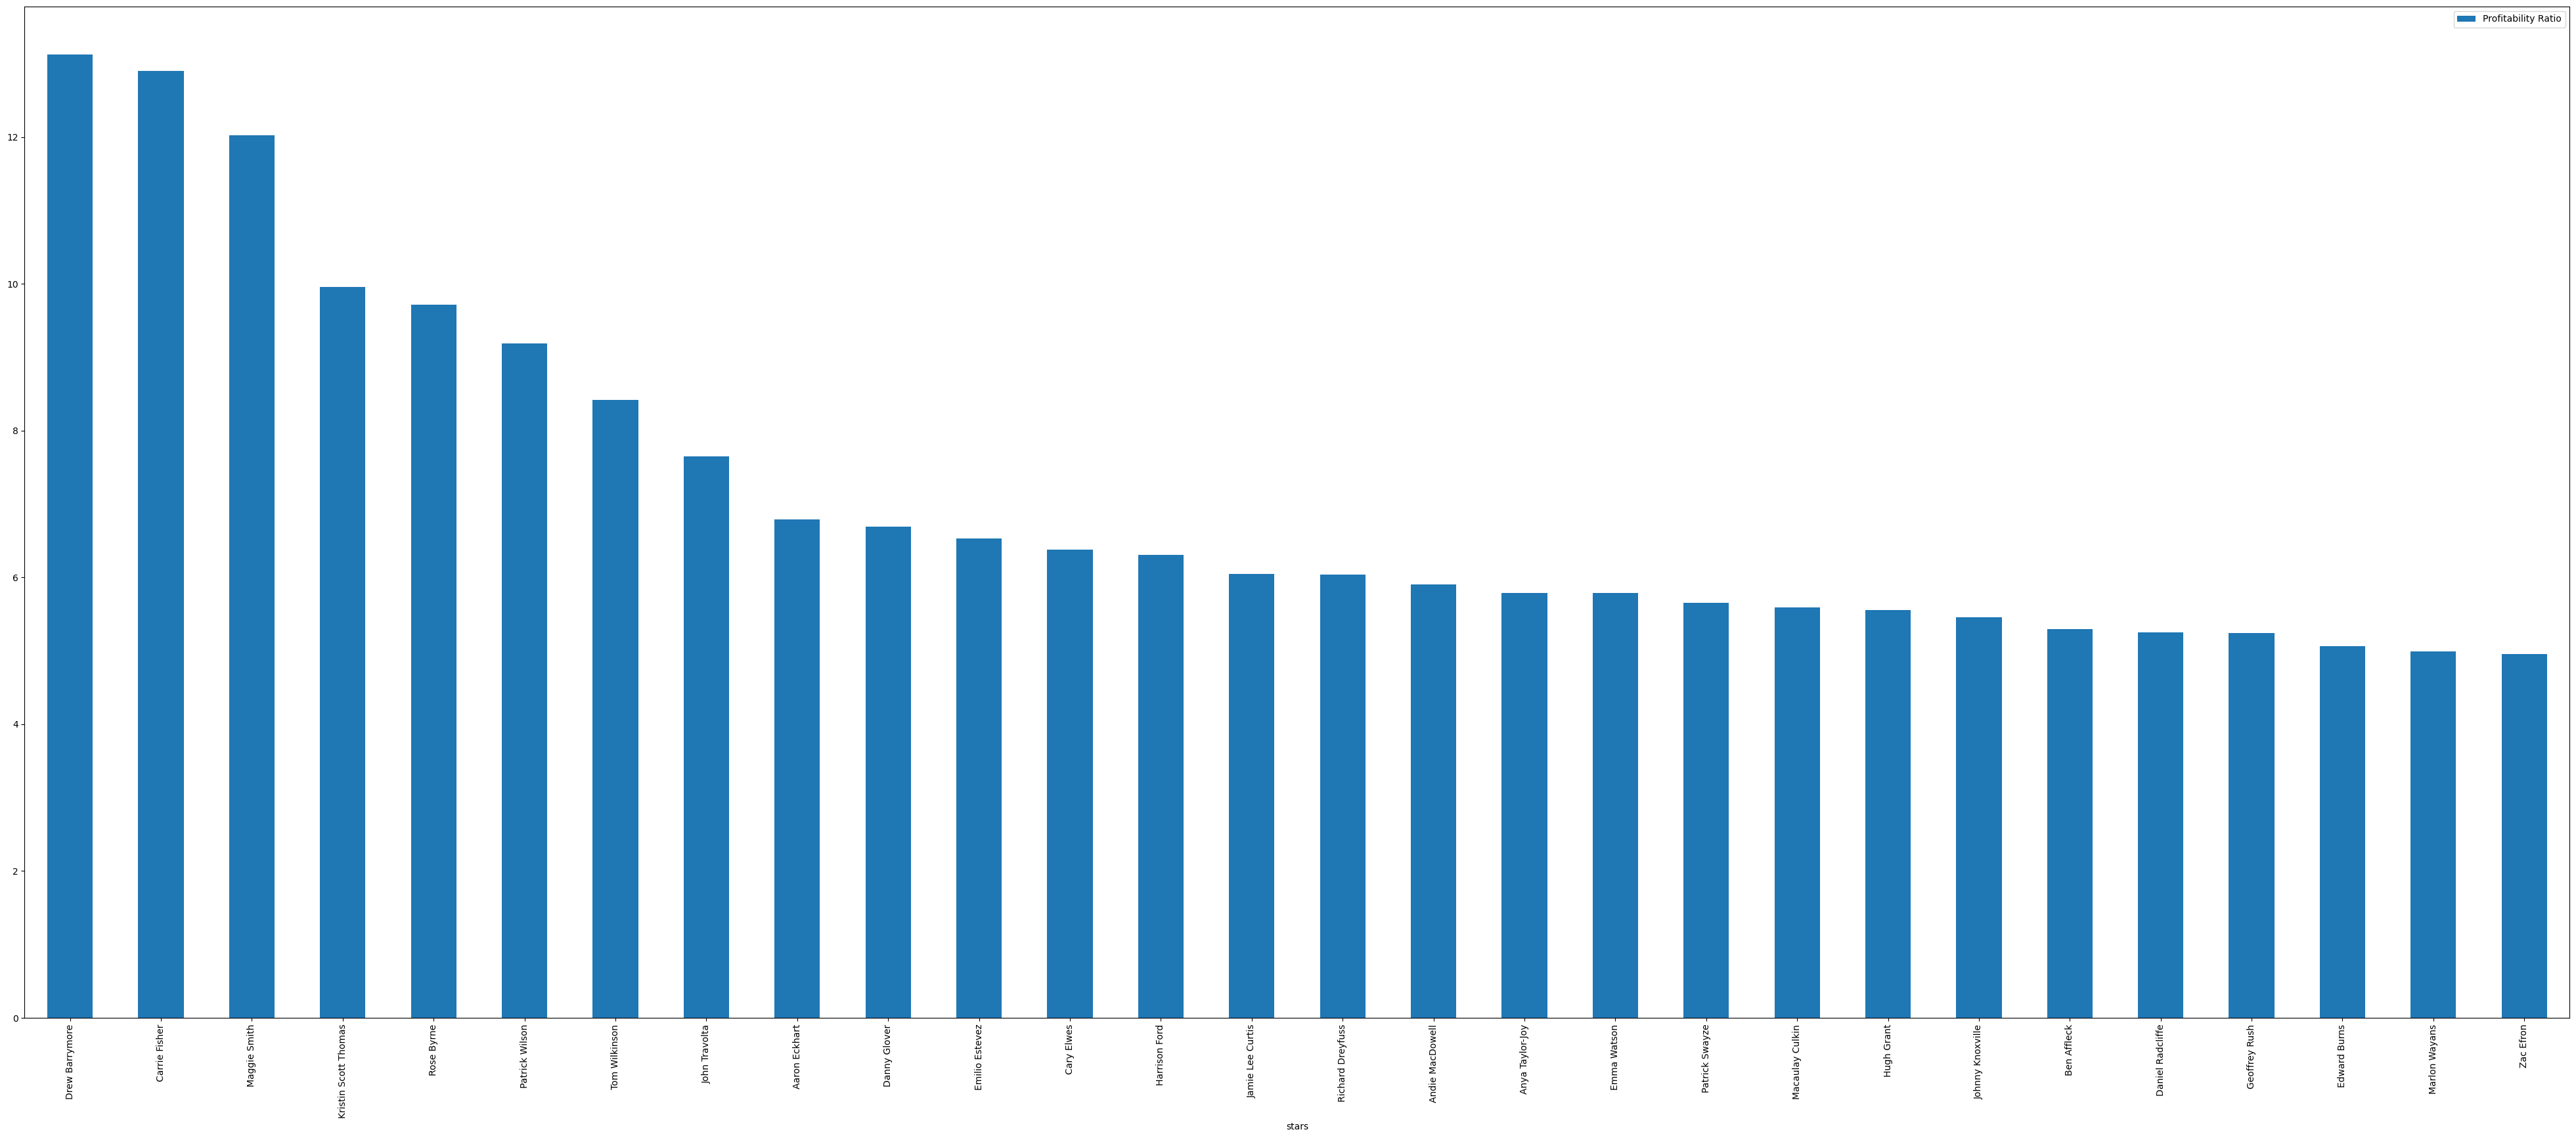

In [92]:
# Plot a bar chart of the profitability ratio for each director, excluding jet li since he is bt far the highest
by_actors_df.iloc[2:30].plot(x='stars', y='Profitability Ratio', kind='bar', figsize=(50, 20))